In [3]:
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

### Check missing values

In [13]:
def print_col_na(df):
    """Print names of columns with missing values

    Args:
        df (pandas Dataframe): Dataframe whose columns are examined
    """
    n_all = df.shape[0]
    for col in df.columns:
        sum_na = df[col].isna().sum()
        if sum_na > 0:
            print('Column \'{}\' has {} missing enties which makes {:.2f}%'\
                .format(col, sum_na, 100*sum_na/n_all))

In [14]:
print_col_na(df)

Column 'Engine Fuel Type' has 3 missing enties which makes 0.03%
Column 'Engine HP' has 69 missing enties which makes 0.58%
Column 'Engine Cylinders' has 30 missing enties which makes 0.25%
Column 'Number of Doors' has 6 missing enties which makes 0.05%
Column 'Market Category' has 3742 missing enties which makes 31.41%


As can be seen 'Market Category' column is missing almost 1/3 of the data, so it would be appropriate to drop the whole column. For the rest of the cases, there is less than 1% missing, so an imputation would be appropriate.

In [18]:
df = df.drop('Market Category', axis=1, errors='ignore')
df.shape

(11914, 15)

In [19]:
### Check 'Engine Fuel Type' missing entries
df[df['Engine Fuel Type'].isna()]

Make   Model  Year Engine Fuel Type  Engine HP  Engine Cylinders  \
11321  Suzuki  Verona  2004              NaN      155.0               6.0   
11322  Suzuki  Verona  2004              NaN      155.0               6.0   
11323  Suzuki  Verona  2004              NaN      155.0               6.0   

      Transmission Type      Driven_Wheels  Number of Doors Vehicle Size  \
11321         AUTOMATIC  front wheel drive              4.0      Midsize   
11322         AUTOMATIC  front wheel drive              4.0      Midsize   
11323         AUTOMATIC  front wheel drive              4.0      Midsize   

      Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
11321         Sedan           25        17         481  17199  
11322         Sedan           25        17         481  20199  
11323         Sedan           25        17         481  18499

The 'Engine Fuel Type' to be imputed will be chosen comparing engine characteristics of other vehicle entries and taking the most common one.

In [24]:
eng_fuel_type_imp = df[(df['Engine HP'] > 140.0) & (df['Engine HP'] < 170.0) & (df['Engine Cylinders'] == 6)]['Engine Fuel Type'].value_counts().sort_values().index[-1]
print(eng_fuel_type_imp)

regular unleaded


In [25]:
df = df['Engine Fuel Type'].fillna(eng_fuel_type_imp)

In [13]:
df['Engine HP'] = df['Engine HP'].fillna(0)
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(0)

In [16]:
df.isna().sum().sort_values()

Make                 0
Model                0
Year                 0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
Engine Fuel Type     3
Number of Doors      6
dtype: int64

In [17]:
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].value_counts().argmax())

/home/aaa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [20]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [14]:
df.describe()

Year     Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11914.000000      11914.000000     11908.000000   
mean    2010.384338    247.941749          5.614655         3.436093   
std        7.579740    110.507669          1.800554         0.881315   
min     1990.000000      0.000000          0.000000         2.000000   
25%     2007.000000    170.000000          4.000000         2.000000   
50%     2015.000000    225.000000          6.000000         4.000000   
75%     2016.000000    300.000000          6.000000         4.000000   
max     2017.000000   1001.000000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549.000000  2.100000e+04  
50%       26.000000     18.000000   1385.000000  2.999500e+04  
75%       30.000000     22.000000   2009.000000  4.223125e+04  
max      354.000000    137.000000   5657.000000  2.065902e+06

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f478caf0f60>,
      dtype=object)

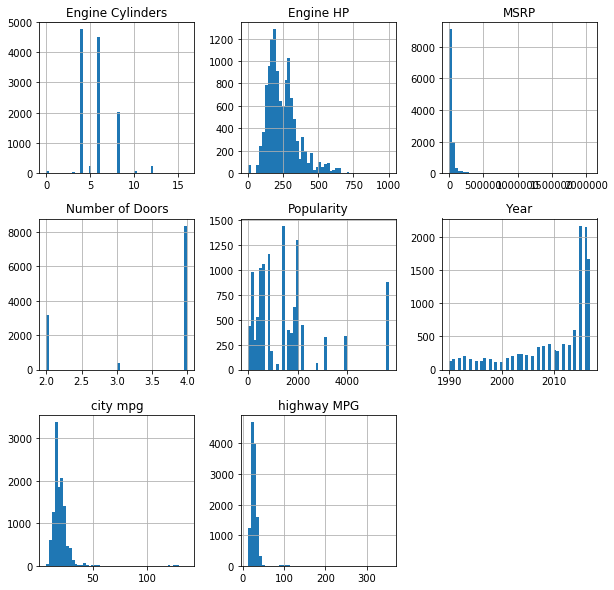

In [15]:
df.hist(bins=50, figsize=(10,10))

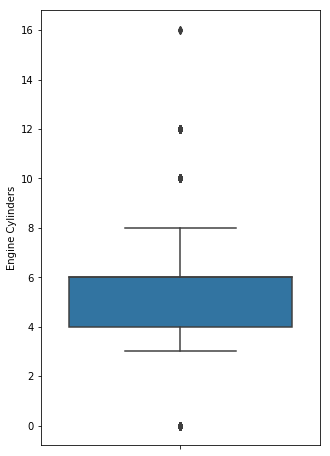

In [21]:
plt.figure(figsize=(5,8))
sns.boxplot(data=df, y='Engine Cylinders')

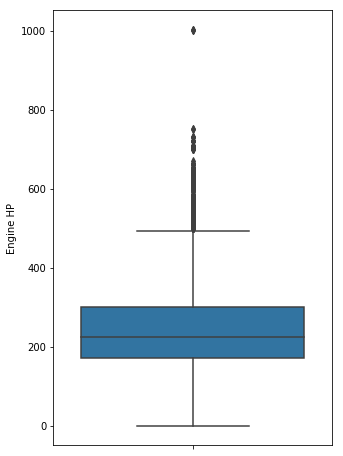

In [22]:
plt.figure(figsize=(5,8))
sns.boxplot(data=df, y='Engine HP')

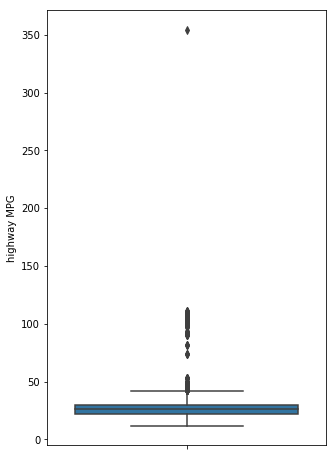

In [23]:
plt.figure(figsize=(5,8))
sns.boxplot(data=df, y='highway MPG')

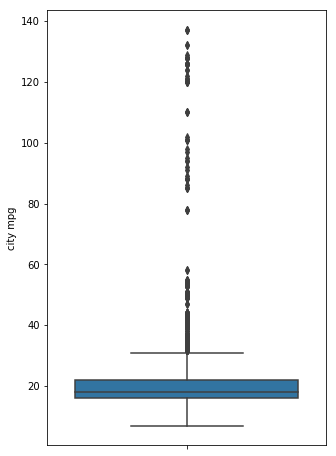

In [25]:
plt.figure(figsize=(5,8))
sns.boxplot(data=df, y='city mpg')

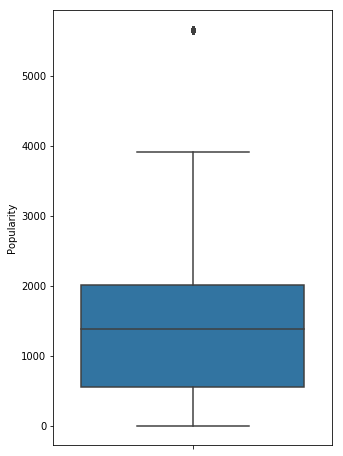

In [26]:
plt.figure(figsize=(5,8))
sns.boxplot(data=df, y='Popularity')

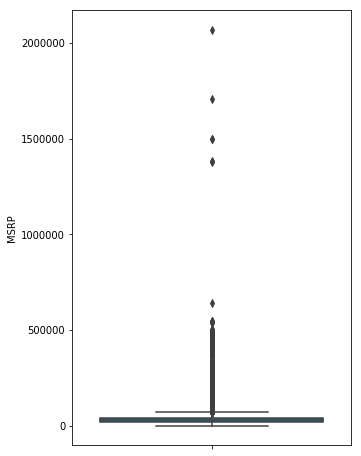

In [27]:
plt.figure(figsize=(5,8))
sns.boxplot(data=df, y='MSRP')

In [30]:
def removing_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)

    IQR = Q3 - Q1

    min = Q1 - 1.5*IQR
    max = Q3 + 1.5*IQR

    df_no_outlier = dataframe[(dataframe[column] > min) & (dataframe[column] < max)]

    return df_no_outlier

In [31]:
#### Removing outlier from MSRP
df = removing_outliers(df, 'MSRP')

In [32]:
#### Removing outlier for Popularity
df = removing_outliers(df, 'Popularity')

In [33]:
#### Removing outliers for city mpg
df = removing_outliers(df, 'city mpg')

In [34]:
#### Removing outliers for 'highway MPG'
df = removing_outliers(df, 'highway MPG')

In [35]:
#### Removing outliers for Engine HP
df = removing_outliers(df, 'Engine HP')

In [36]:
#### Removing outliers for Engine Cylinders
df = removing_outliers(df, 'Engine Cylinders')

In [37]:
df.describe()

Year    Engine HP  Engine Cylinders  Number of Doors  \
count  9671.000000  9671.000000       9671.000000      9671.000000   
mean   2009.984283   226.273808          5.337711         3.495192   
std       7.801305    76.646144          1.376154         0.853457   
min    1990.000000     0.000000          3.000000         2.000000   
25%    2006.000000   168.000000          4.000000         3.000000   
50%    2014.000000   210.000000          6.000000         4.000000   
75%    2016.000000   285.000000          6.000000         4.000000   
max    2017.000000   455.000000          8.000000         4.000000   

       highway MPG     city mpg   Popularity          MSRP  
count  9671.000000  9671.000000  9671.000000   9671.000000  
mean     26.633440    19.437804  1199.939406  28584.348568  
std       5.798384     4.420835   852.597148  15954.528147  
min      12.000000    10.000000    21.000000   2000.000000  
25%      23.000000    16.000000   549.000000  19892.500000  
50%      26.000000    19.000000   873.000000  28380.000000  
75%      31.000000    22.000000  1851.000000  38482.500000  
max      42.000000    33.000000  3916.000000  74000.000000

In [38]:
df.shape

(9671, 15)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9671 entries, 0 to 11913
Data columns (total 15 columns):
Make                 9671 non-null object
Model                9671 non-null object
Year                 9671 non-null int64
Engine Fuel Type     9671 non-null object
Engine HP            9671 non-null float64
Engine Cylinders     9671 non-null float64
Transmission Type    9671 non-null object
Driven_Wheels        9671 non-null object
Number of Doors      9671 non-null float64
Vehicle Size         9671 non-null object
Vehicle Style        9671 non-null object
highway MPG          9671 non-null int64
city mpg             9671 non-null int64
Popularity           9671 non-null int64
MSRP                 9671 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 1.2+ MB


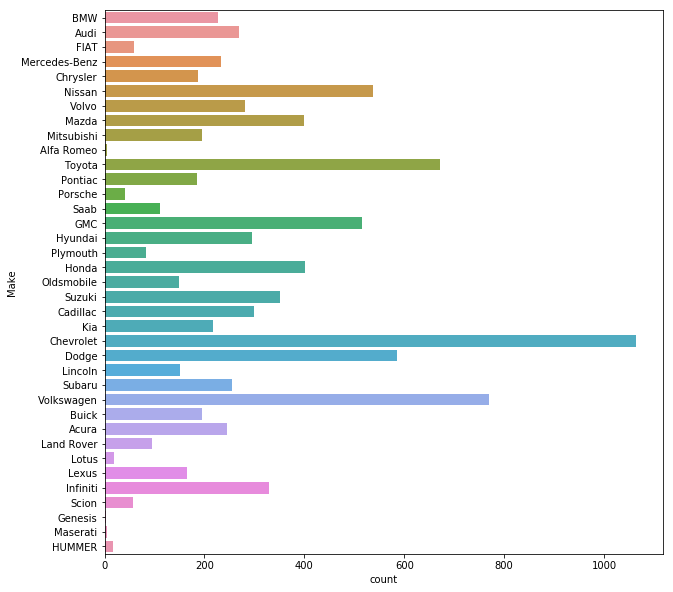

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, y='Make')

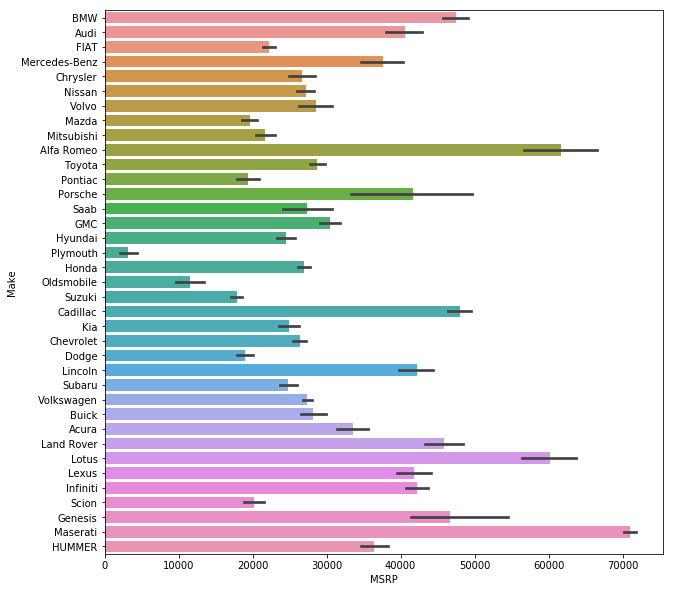

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='Make', x='MSRP')

In [42]:
df['Model'].value_counts()

Silverado 1500            156
Tundra                    140
Sierra 1500                90
Beetle Convertible         89
Tacoma                     80
GTI                        76
Frontier                   76
Beetle                     75
Accord                     75
Dakota                     65
Civic                      64
Ram Pickup 1500            62
C/K 1500 Series            56
XC60                       54
Colorado                   54
3                          53
Jetta                      53
Sienna                     51
370Z                       51
Golf GTI                   50
Sierra 1500 Classic        49
Silverado 1500 Classic     49
Pilot                      48
Canyon                     48
Jetta GLI                  44
E-Class                    44
Passat                     44
CTS                        42
Jetta SportWagen           42
A3                         40
                         ... 
SLC-Class                   2
Corolla iM                  2
M37       

In [43]:
df['Engine Fuel Type'].value_counts()

regular unleaded                                6382
premium unleaded (recommended)                  1345
premium unleaded (required)                     1137
flex-fuel (unleaded/E85)                         647
diesel                                           122
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
flex-fuel (premium unleaded required/E85)          4
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [47]:
df['Engine Fuel Type'].mode()[0]

'regular unleaded'

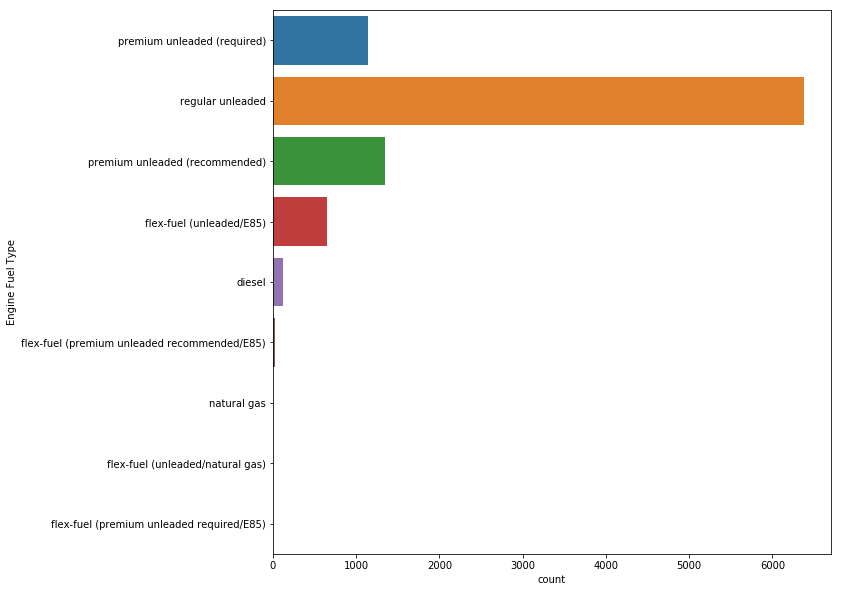

In [48]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, y='Engine Fuel Type')

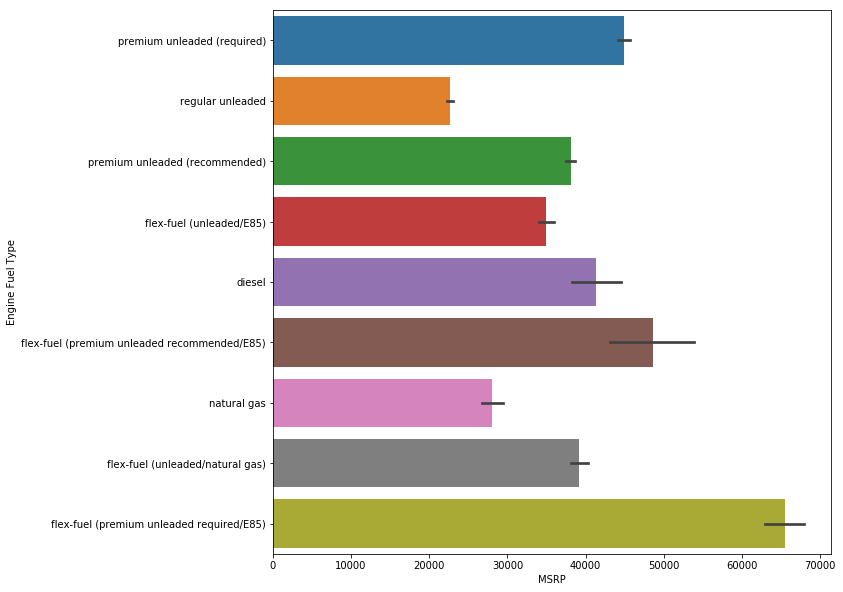

In [49]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df, y='Engine Fuel Type', x='MSRP')

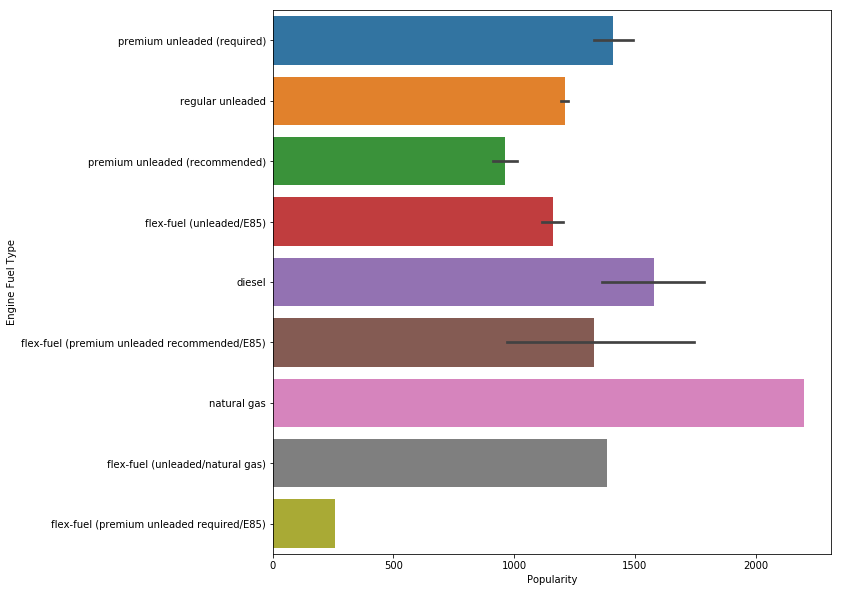

In [50]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df, y='Engine Fuel Type', x='Popularity')

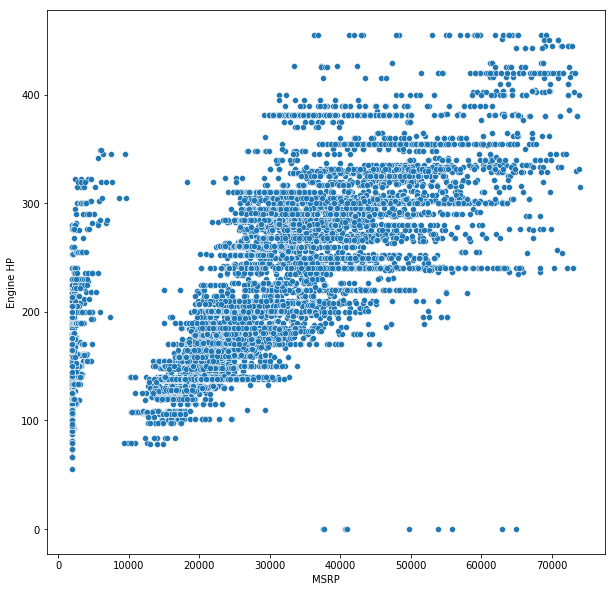

In [51]:
#### Scatter plot Engine HP
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, y='Engine HP', x='MSRP')

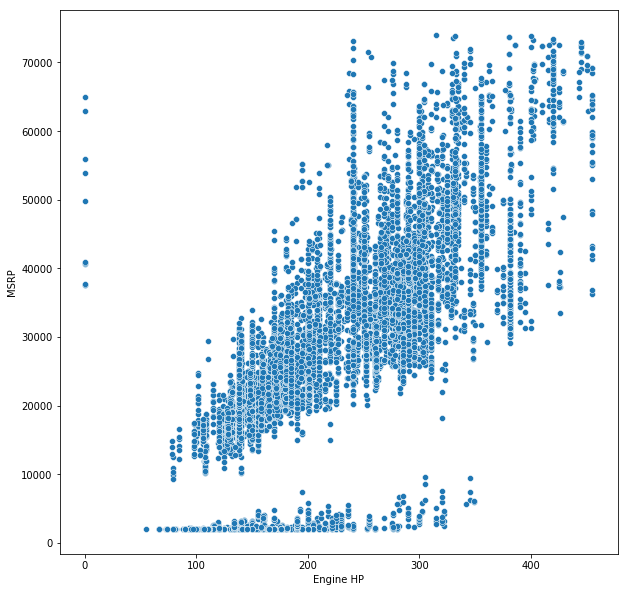

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='Engine HP', y='MSRP')

In [57]:
df[df['MSRP'] < 8000].head()

Make Model  Year  Engine Fuel Type  Engine HP  Engine Cylinders  \
17  Audi   100  1992  regular unleaded      172.0               6.0   
18  Audi   100  1992  regular unleaded      172.0               6.0   
19  Audi   100  1992  regular unleaded      172.0               6.0   
20  Audi   100  1992  regular unleaded      172.0               6.0   
21  Audi   100  1992  regular unleaded      172.0               6.0   

   Transmission Type      Driven_Wheels  Number of Doors Vehicle Size  \
17            MANUAL  front wheel drive              4.0      Midsize   
18            MANUAL  front wheel drive              4.0      Midsize   
19         AUTOMATIC    all wheel drive              4.0      Midsize   
20            MANUAL  front wheel drive              4.0      Midsize   
21            MANUAL    all wheel drive              4.0      Midsize   

   Vehicle Style  highway MPG  city mpg  Popularity  MSRP  
17         Sedan           24        17        3105  2000  
18         Sedan           24        17        3105  2000  
19         Wagon           20        16        3105  2000  
20         Sedan           24        17        3105  2000  
21         Sedan           21        16        3105  2000

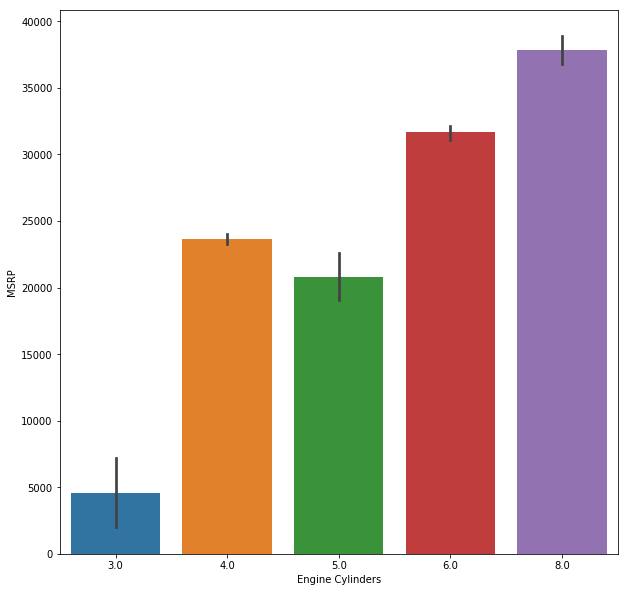

In [56]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='MSRP', x='Engine Cylinders')

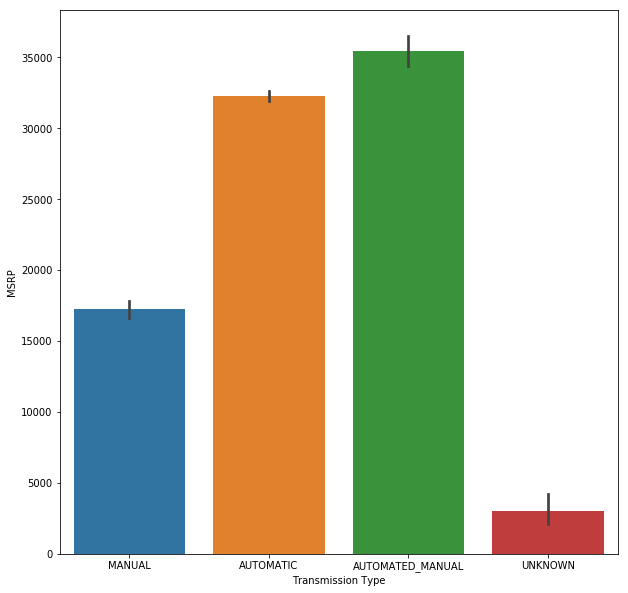

In [58]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='MSRP', x='Transmission Type')

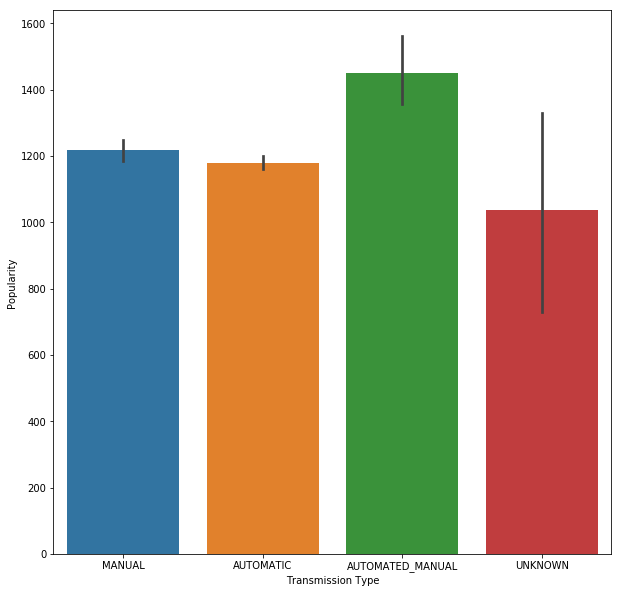

In [59]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='Popularity', x='Transmission Type')

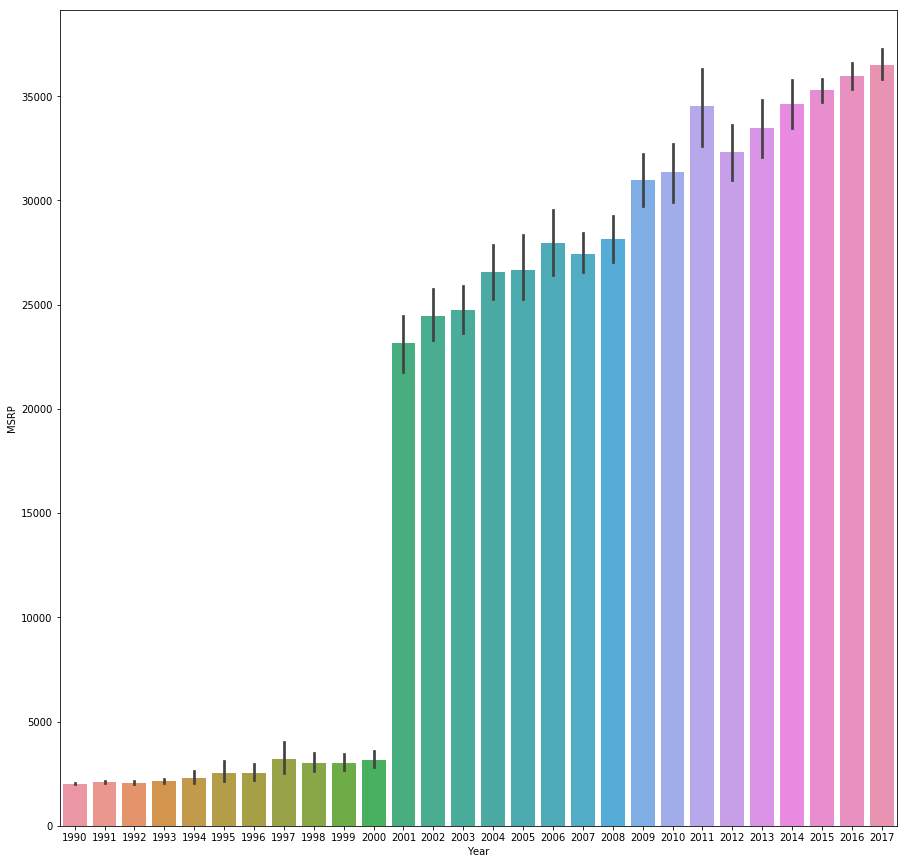

In [67]:
plt.figure(figsize=(15,15))
sns.barplot(x='Year', data=df, y='MSRP')

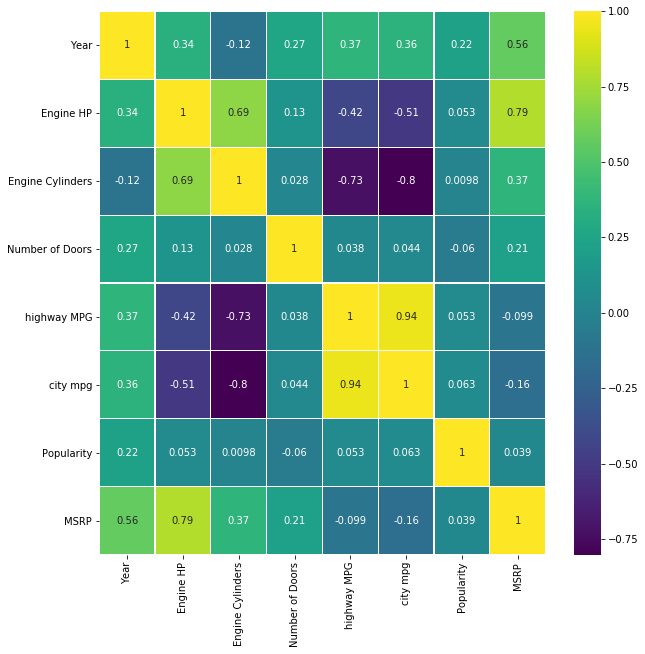

In [73]:
#### Let see the correlation of all the features
corr = df.corr(method='spearman')
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='viridis', annot=True, linewidths=0.1)